In [1]:
import numpy as np
import matplotlib.pyplot as plt

from evaluation import eval, eval_multi, logger, MODE_ADVERSARY, MODE_RANDOM, MODE_ADV_TASK_DIVERSITY
%load_ext autoreload
%autoreload 2

In [7]:
d = 10
n_gen_context = 20 # Sample from the action set
T = 500 # Timesteps
n_sim = 1 # Number of Simulations
m = 3
n_task = 400
assert m<=d, "m >= d"
if T<d**2:
    logger.info(f"Warning: T < d**2")
if n_task < T**2:
    logger.info(f"Warning: n_task < T**2")
alpha_set = [1.0] # Bonus for UCB
v_set = [1.0] # Bonus for TS
alpha_PHE_set = [1.0] # Bonus for PHE
tau_1_PEGE_set = [T//2] # EXR length for PEGE
is_multi = True
adv_exr_const = 1 # scaling factor for adversary task generation
PMA_exr_const = 1.5 # scaling factor for exploration probability
PMA_lr_const = 1 # scaling factor for the learning rate
PMA_n_expert = 20 # Expert set size for PMA
PMA_tau1_const = 1 # scaling factor for PEGE's EXR length in the EXR phase
PMA_tau2_const = 1 # scaling factor for PEGE's EXR length in the EXT phase
PMA_alpha_const = 1 # scaling factor for PMA's alpha threshold
input_dict = {
    "d":d,
    "n_gen_context":n_gen_context,
    "T":T,
    "n_sim":n_sim,
    "rho":0.5,
    "noise_std":0.3,
    "seed":None, #TODO: bug here, must set to None
    "output":True,
    "params_set":alpha_set,
    "m":m,
    "n_task":n_task,
    "adv_exr_const":adv_exr_const,
    "PMA_exr_const":PMA_exr_const,
    "PMA_lr_const":PMA_lr_const,
    "mode":MODE_ADV_TASK_DIVERSITY,
    "PMA_n_expert":PMA_n_expert,
    "PMA_tau1_const":PMA_tau1_const,
    "PMA_tau2_const":PMA_tau2_const,
    "PMA_alpha_const":PMA_alpha_const,
}

2024-05-24 23:09:39 Warning: n_task < T**2


In [ ]:
# input_dict["name"] = "TS"
# input_dict["params_set"] = v_set
# if is_multi:
#     best_TS = eval_multi(input_dict)
# else:
#     best_TS = eval(input_dict)

# input_dict["name"] = "PEGE"
# input_dict["params_set"] = tau_1_PEGE_set
# if is_multi:
#     best_PEGE = eval_multi(input_dict)
# else:
#     best_PEGE = eval(input_dict)

# input_dict["name"] = "PHE"
# input_dict["params_set"] = alpha_PHE_set
# if is_multi:
#     best_PHE = eval_multi(input_dict)
# else:
#     best_PHE = eval(input_dict)

In [11]:
input_dict["name"] = "UCB"
input_dict["params_set"] = alpha_set
if is_multi:
    best_UCB = eval_multi(input_dict)
else:
    best_UCB = eval(input_dict)

UCB Simulation 1, N_gen_ctx=20, d=10


100%|██████████| 400/400 [03:35<00:00,  1.86it/s]


In [ ]:
if is_multi:
    input_dict["name"] = "PMA"
    input_dict["params_set"] = [None] # Placeholder
    input_dict["PMA_exr_const"] = 0.3 #p=0.1 is good
    input_dict["PMA_tau1_const"] = 0.9 #Large enough to have a good estimate of theta. tau_1 = 150 is good for d=10
    input_dict["PMA_tau2_const"] = 0.3 #tau_2 = 20 is ok for m = 3
    input_dict["PMA_alpha_const"] = 0.4 #Small enough to filter wrong experts
    best_PMA = eval_multi(input_dict)

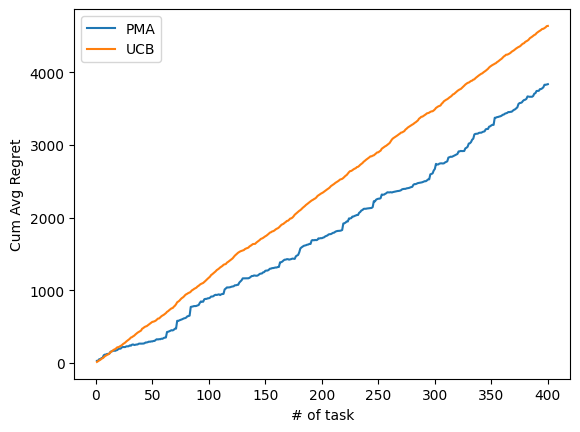

In [52]:
mean_UCB = np.mean(best_UCB['regrets'], axis=0)
std_UCB = np.std(best_UCB['regrets'], axis=0)
mean_PMA = np.mean(best_PMA['regrets'], axis=0)
std_PMA = np.std(best_PMA['regrets'], axis=0)
X = np.arange(1,n_task+1)
plt.plot(X, mean_PMA, '-', label='PMA')
plt.fill_between(X, mean_PMA-std_PMA, mean_PMA+std_PMA, alpha=0.5)
plt.plot(X, mean_UCB, '-', label='UCB')
plt.fill_between(X, mean_UCB-std_UCB, mean_UCB+std_UCB, alpha=0.5)
plt.xlabel('# of task')
plt.ylabel('Cum Avg Regret')
plt.legend()
plt.show()
plt.close()

In [ ]:
# def round(X, precision = .03):
#     return np.round(np.array(X)/precision)*precision
# round(mean_PMA)

In [54]:
# from scipy.interpolate import Rbf

# X = np.arange(1,n_task+1)
# rbf = Rbf(X, mean_UCB, function = 'multiquadric', smooth = 500)
# y_UCB_rbf = rbf(X)
# rbf = Rbf(X, mean_PMA, function = 'multiquadric', smooth = 500)
# y_PMA_rbf = rbf(X)

# plt.plot(X, y_PMA_rbf, '-', label='PMA')
# plt.fill_between(X, y_PMA_rbf-std_PMA, y_PMA_rbf+std_PMA, alpha=0.5)
# plt.plot(X, y_UCB_rbf, '-', label='UCB')
# plt.fill_between(X, y_UCB_rbf-std_UCB, y_UCB_rbf+std_UCB, alpha=0.5)
# plt.xlabel('# of task')
# plt.ylabel('Cum Avg Regret')

# plt.legend()
# plt.show()

In [55]:
# input_dict["n_sim"] = 5

# input_dict["name"] = "UCB"
# input_dict["params_set"] = alpha_set
# best_UCB = eval(input_dict)

# input_dict["name"] = "TS"
# input_dict["params_set"] = v_set
# best_TS = eval(input_dict)

# mean_UCB = np.mean(best_UCB['regrets'], axis=0)
# std_UCB = np.std(best_UCB['regrets'], axis=0)
# mean_TS = np.mean(best_TS['regrets'], axis=0)
# std_TS = np.std(best_TS['regrets'], axis=0)
# X = np.arange(1,T+1)
# plt.plot(X, mean_TS, '-', label='TS')
# plt.fill_between(X, mean_TS-std_TS, mean_TS+std_TS, alpha=0.5)
# plt.plot(X, mean_UCB, '-', label='UCB')
# plt.fill_between(X, mean_UCB-std_UCB, mean_UCB+std_UCB, alpha=0.5)
# plt.xlabel('# of step')
# plt.ylabel('Cum Avg Regret')
# plt.legend()
# plt.show()
# plt.close()